# File and libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_encoded.csv'


file_tag = "df_merch_mv_input"

# DSLabs functions

In [37]:
%run "scripts/dslabs_functions.py"


# Data functions

In [38]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [39]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.05, replace=False)
    

else:
    data=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371486 entries, 0 to 371485
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       371486 non-null  int64  
 1   device_category                  371486 non-null  int64  
 2   device_mobile_brand_name         371486 non-null  int64  
 3   device_mobile_model_name         371485 non-null  float64
 4   device_operating_system          371486 non-null  int64  
 5   device_operating_system_version  258782 non-null  float64
 6   device_language                  198988 non-null  float64
 7   device_web_info_browser          371486 non-null  int64  
 8   device_web_info_browser_version  362221 non-null  float64
 9   geo_country                      371486 non-null  int64  
 10  geo_region                       367139 non-null  float64
 11  geo_city                         351257 non-null  float64
 12  tr

# Missing Values Analysis

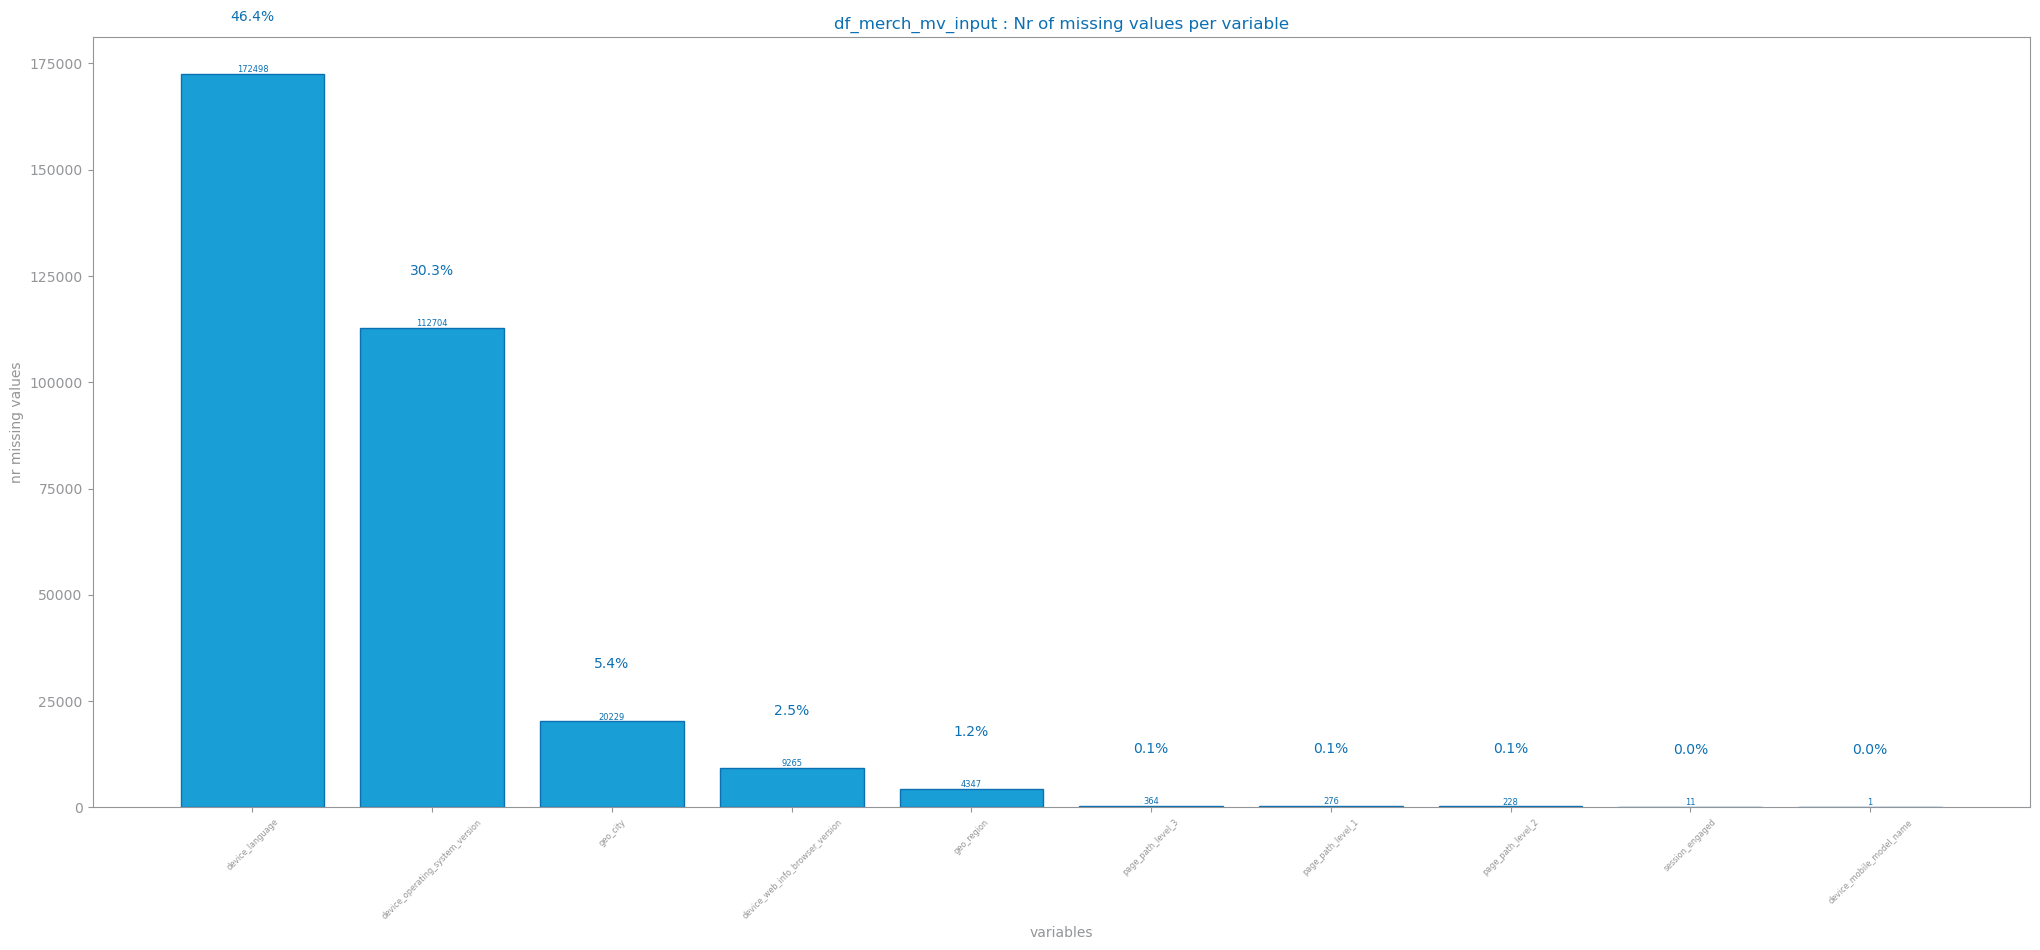

In [40]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - Most Frequent Srategy

## MV1 strategy aplication

In [41]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter
data_1 =  mvi_by_filling(data, strategy="frequent")

data_1.describe()


,event_name,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_region,...,day_cos,day_of_week_nr_sin,day_of_week_nr_cos,geo_country,session_engaged,returning_user,year,quarter,is_weekend,domain
count,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,...,371486.000000,3.714860e+05,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000,371486.000000
mean,6.810461,1.814496,4.771211,10.428233,3.715001,4.570577,6.784148,2.190688,4.350187,2991.747346,...,-0.062767,8.606962e-02,0.085796,1.145666,0.915488,0.258405,1.261886,1.261886,0.198255,1.965460
std,1.856345,0.971877,1.344320,3.006964,1.587189,2.426840,1.557367,0.641944,1.785209,1763.518485,...,0.701285,6.558824e-01,0.745018,0.352772,0.278154,0.437759,0.439662,0.439662,0.398686,0.182611
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.994869,-8.660254e-01,-1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,6.000000,1.000000,4.000000,8.000000,2.000000,2.000000,6.784148,2.000000,3.000000,1580.000000,...,-0.758758,-2.449294e-16,-0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,8.000000,1.000000,5.000000,10.000000,4.000000,4.570577,6.784148,2.000000,4.000000,3621.000000,...,-0.050649,0.000000e+00,0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
75%,8.000000,3.000000,5.000000,12.000000,5.000000,5.000000,8.000000,3.000000,4.350187,4382.000000,...,0.688967,8.660254e-01,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000
max,13.000000,3.000000,9.000000,19.000000,6.000000,10.000000,8.000000,4.000000,11.000000,6491.000000,...,1.000000,8.660254e-01,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000


## MV1 target class

In [42]:
from numpy import array, ndarray

target = "returning_user"
labels: list = list(data_1[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_1[data_1[target] == negative]),
        len(data_1[data_1[target] == positive]),
    ]
}

y: array = data_1.pop(target).to_list()
X: ndarray = data_1.values

Labels=[0.0, 1.0]


## MV1 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

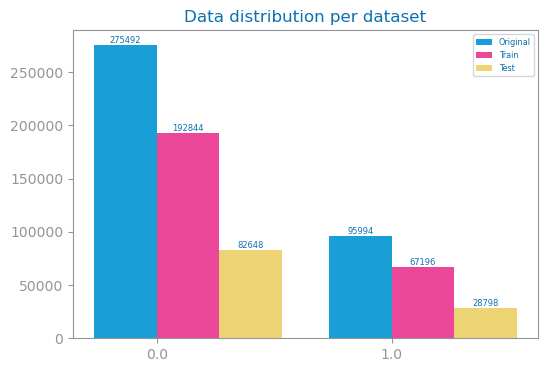

In [43]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_1.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_1.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## MV1 evaluate

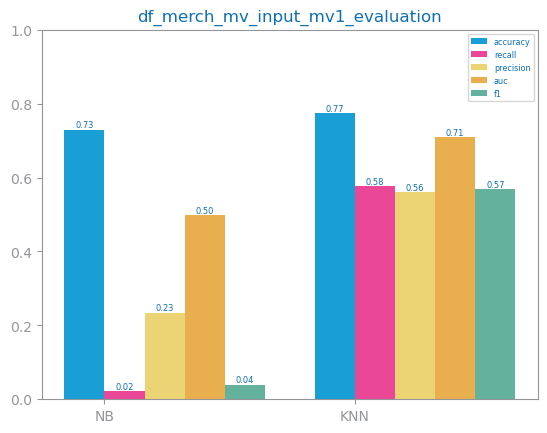

In [44]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

figure()
eval: dict[str, list] = evaluate_approach(train, test, target='returning_user', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag}_mv1_evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv1_evaluation.png")
show()

# MV2 - drop null strategy

1. Remove 'device_operating_system_version','device_language' due to high % of null values
2. Remove remaining null values records

## MV2 strategy aplication

In [45]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]
data_2 = data.drop(['device_operating_system_version','device_language'], axis=1)
data_2 = data_2.dropna(axis=0, how="any")

## MV2 target class

In [46]:
from numpy import array, ndarray

target = "returning_user"
labels: list = list(data_2[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_2[data_2[target] == negative]),
        len(data_2[data_2[target] == positive]),
    ]
}

y: array = data_2.pop(target).to_list()
X: ndarray = data_2.values

Labels=[0, 1]


## MV2 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

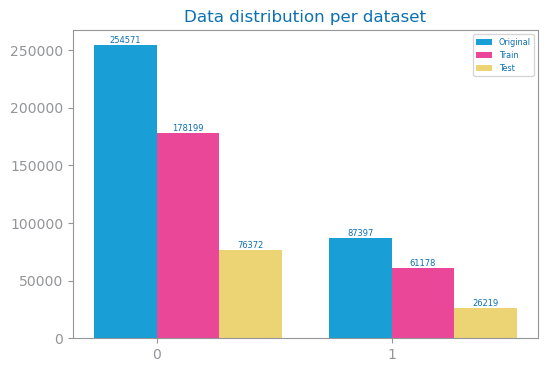

In [47]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_2.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_2.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## MV2 evaluate

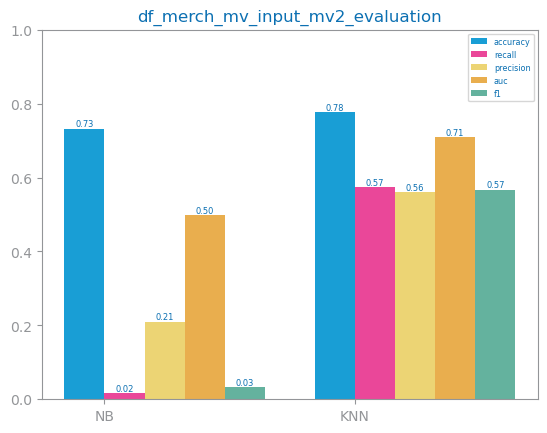

In [48]:

figure()
eval: dict[str, list] = evaluate_approach(train, test, target='returning_user', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag}_mv2_evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv2_evaluation.png")
show()

# save to csv

In [49]:
# # choose final version
# data_final=data_1

# # Saving to CSV files
# data_final.to_csv('data/df_merch_mv_input.csv',index=False)
